In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math


from sklearn import datasets

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


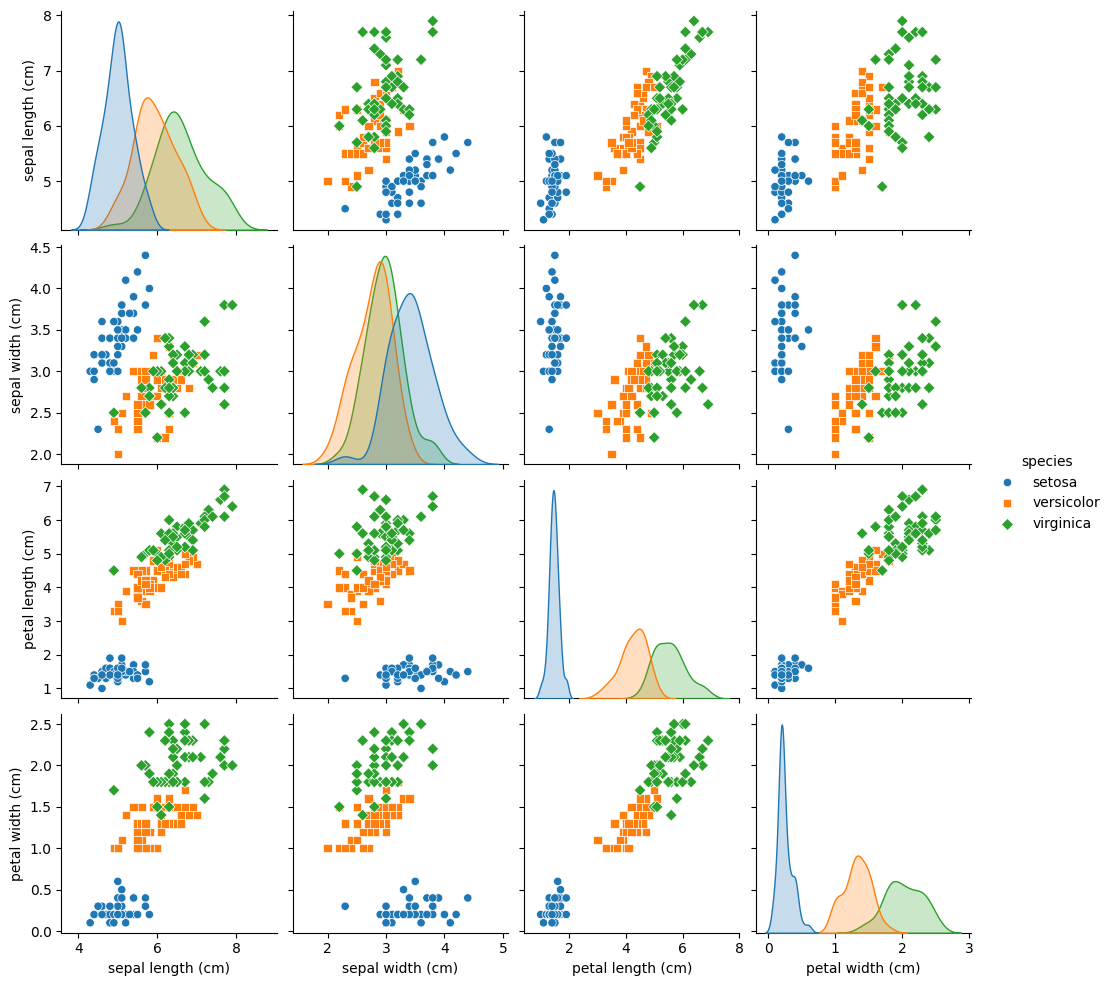

In [11]:
from sklearn import datasets
data = datasets.load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['species'] = pd.Categorical.from_codes(data.target, data.target_names)

print(df.head())
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Create pairplot
sns.pairplot(df, hue='species', markers=["o", "s", "D"])

# Show the plot
plt.show()

In [63]:
import math
import pandas as pd  # Ensure pandas is imported

# Function to calculate entropy
def entropy(df):
    # get number of unique species
    unique_species = df['species'].unique()
    # calculate entropy
    entropy = 0
    for species in unique_species:
        p = len(df[df['species'] == species]) / len(df)
        entropy += -p * math.log2(p)
    return entropy
    
# Assuming 'df' is your DataFrame and it's already loaded with 'species' and 'petal width (cm)' columns
# Calculate the initial entropy of the whole dataset
total_entropy = entropy(df)
print("Initial entropy of the whole dataset:", total_entropy)

# Split the data based on 'petal width (cm)' at 0.5
df1 = df[df['petal width (cm)'] <= 0.5]
df2 = df[df['petal width (cm)'] > 0.5]

# Calculate entropy for each subset
entropy_df1 = entropy(df1)
entropy_df2 = entropy(df2)

print("Entropy of subset 1:", entropy_df1)
print("Entropy of subset 2:", entropy_df2)
# Calculate information gain
information_gain = total_entropy - (entropy_df1 + entropy_df2)/2
print("Information gain:", information_gain)

# Split the data based on 'petal width (cm)' at 0.38
df1 = df[df['petal width (cm)'] <= 0.38]
df2 = df[df['petal width (cm)'] > 0.38]

# Calculate entropy for each subset
entropy_df1 = entropy(df1)
entropy_df2 = entropy(df2)

print("Entropy of subset 1:", entropy_df1)
print("Entropy of subset 2:", entropy_df2)
# Calculate information gain
information_gain = total_entropy - (entropy_df1 + entropy_df2)/2
print("Information gain:", information_gain)



Initial entropy of the whole dataset: 1.584962500721156
Entropy of subset 1: 0.0
Entropy of subset 2: 1.0702350572322654
Information gain: 1.0498449721050234
Entropy of subset 1: 0.0
Entropy of subset 2: 1.3285976826626762
Information gain: 0.920663659389818


Accuracy: 1.0


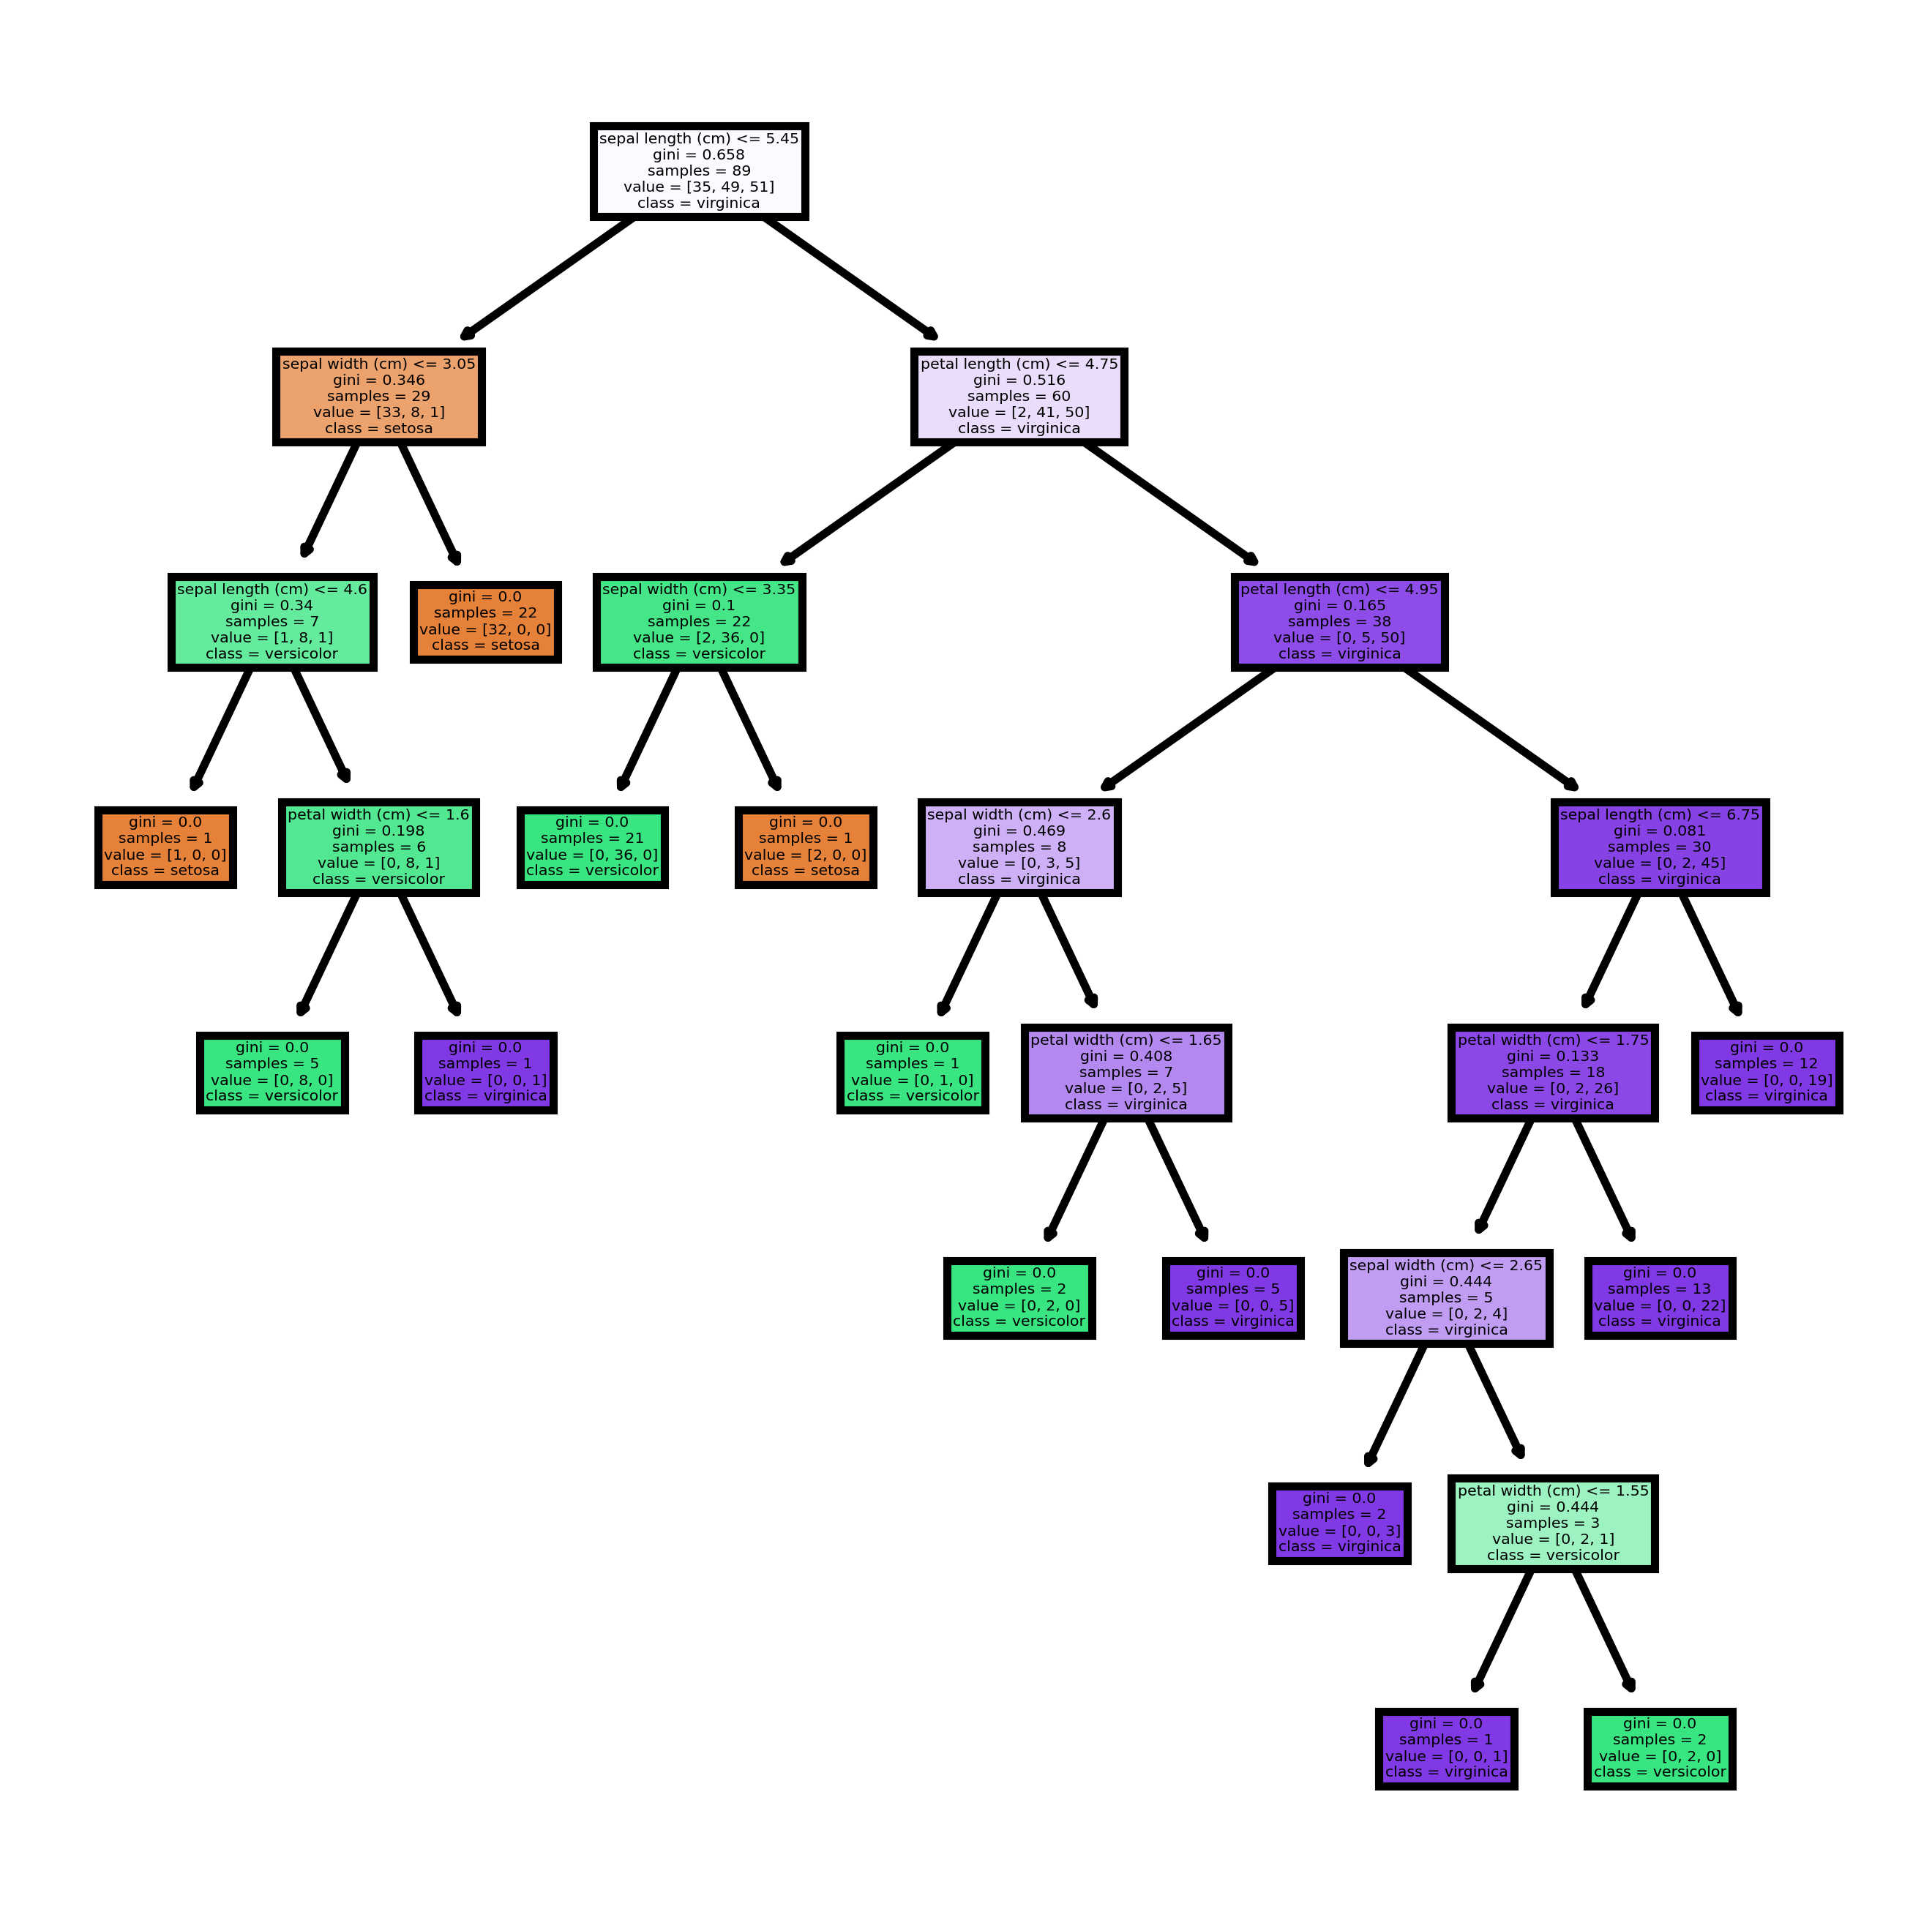

In [20]:
from sklearn import ensemble
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree

iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Create a random forest with 15 trees
clf = ensemble.RandomForestClassifier(n_estimators=15)
clf = clf.fit(X_train, y_train)

# Predict the test set
y_pred = clf.predict(X_test)

# Print the accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

# plot the forest 
fn=iris.feature_names
cn=iris.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
for index in range(0, 15):
    tree.plot_tree(clf.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,);

